In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib widget
plt.ioff()

# DATA

In [2]:
data = np.load("data/test(0.086) 2024-12-03 18:20:21.npz")
height_map = data['height_map']
traj = data['traj']
obj_mask = data['obj_mask']
obj_pos = data['obj_pos']
obj_normal_map = data['obj_normal_map']

mask_center = ((obj_mask.shape[0]-1) / 2, (obj_mask.shape[1]-1) / 2) # (Y,X)

def global_coord(local_coords):
        return obj_pos[0] + local_coords[0], obj_pos[1] + local_coords[1]



# IS 3D ?

In [3]:
IS_3D = True

# FIGURE

In [4]:
FIG = plt.figure(figsize=(10, 7))
AX = None
if IS_3D:
    AX = FIG.add_subplot(111, projection='3d')
    AX.set_title("3D Height Map - Sand Simulator")
    AX.set_zlabel("Z")
else:
    AX = FIG.add_subplot(111)
    AX.set_title("Height Map - Sand Simulator")

AX.set_ylim(0, height_map.shape[0])
AX.set_xlim(0, height_map.shape[1])
AX.set_xlabel("X")
AX.set_ylabel("Y")
plt.legend("")



# MAP

In [5]:
if IS_3D:
    # Create a grid of coordinates ofr 3D plotting
    y = np.arange(height_map.shape[0])
    x = np.arange(height_map.shape[1])
    x_meshed, y_meshed = np.meshgrid(x, y)

    plot = AX.plot_surface(x_meshed, y_meshed, height_map, cmap="terrain", edgecolor='k', alpha=0.4)
    cbar = FIG.colorbar(plot, ax=AX, shrink=0.5, aspect=10, label='Height')
else:
    im = AX.imshow(height_map, cmap="terrain", origin="lower")
    cbar = FIG.colorbar(im, ax=AX, label="Height")

# TRAJ

In [6]:
if traj.size > 0:
    if IS_3D:
        AX.plot(traj[:, 1], traj[:, 0], np.full(traj[:,0].shape,np.min(height_map)), color="red", marker='o', label="Object Trajectory")
    else:
        AX.plot(traj[:, 1], traj[:, 0], color="red", marker='o', label="Object Trajectory")

# MASK

In [7]:
if IS_3D:
    pass
else:
    y=obj_pos[0]-0.5
    x=obj_pos[1]-0.5
    h=obj_mask.shape[0]
    w=obj_mask.shape[1]
    im = AX.imshow(obj_mask, origin="lower", cmap='coolwarm', extent=(x,x+w,y,y+h), alpha=obj_mask.astype(float))

# NORMAL MAP

In [8]:
concat = np.column_stack(obj_normal_map[0:2])
transformed = np.apply_along_axis(lambda coord: global_coord(coord + mask_center),1,concat)
Y = transformed[:,0]
X = transformed[:,1]
V = obj_normal_map[2]
U = obj_normal_map[3]

# Show sampled results for better visibility
mask1 = np.random.randint(0, 1, size=len(obj_normal_map[0])) == 0
if IS_3D:
    Z = np.zeros_like(X)
    W = np.zeros_like(U)
    qc = AX.quiver(X[mask1], Y[mask1], Z[mask1], U[mask1], V[mask1], W[mask1], color='blue',length=np.mean(obj_mask.shape)/2)
else:
    qc = AX.quiver(X[mask1], Y[mask1], U[mask1], V[mask1], color='blue')

# DISPLAY

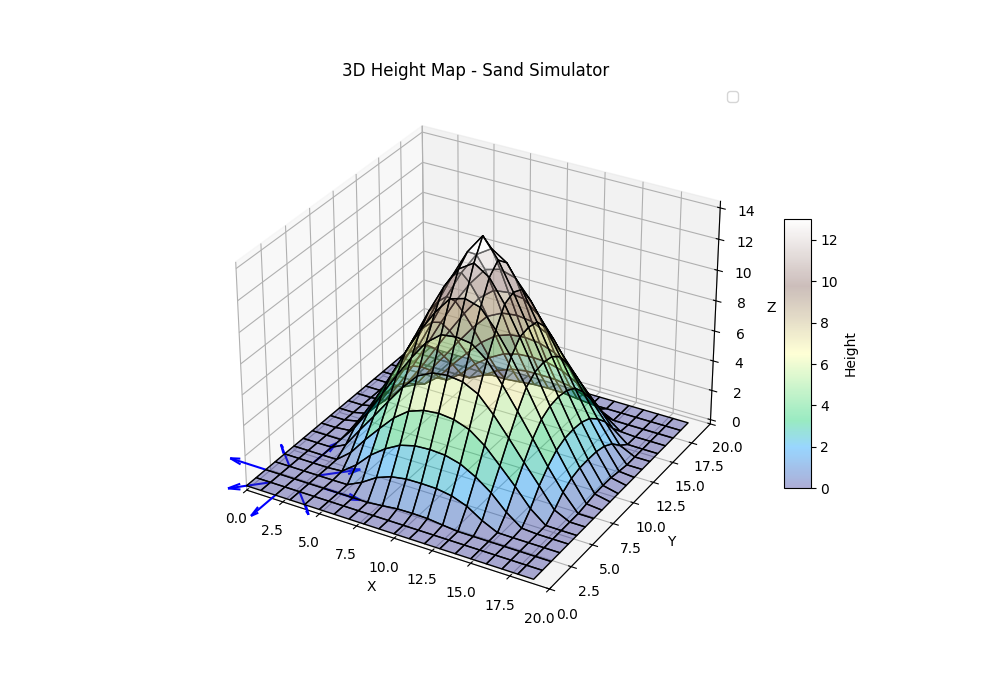

In [9]:
plt.show()